# Exercise 2 - Interactive charting with plotly

## In this exercise, you learn how to do interactive charting with plotly express and with plotly graph objects.

# 0. Internet usage
## This visualization comes from ourworldindata.

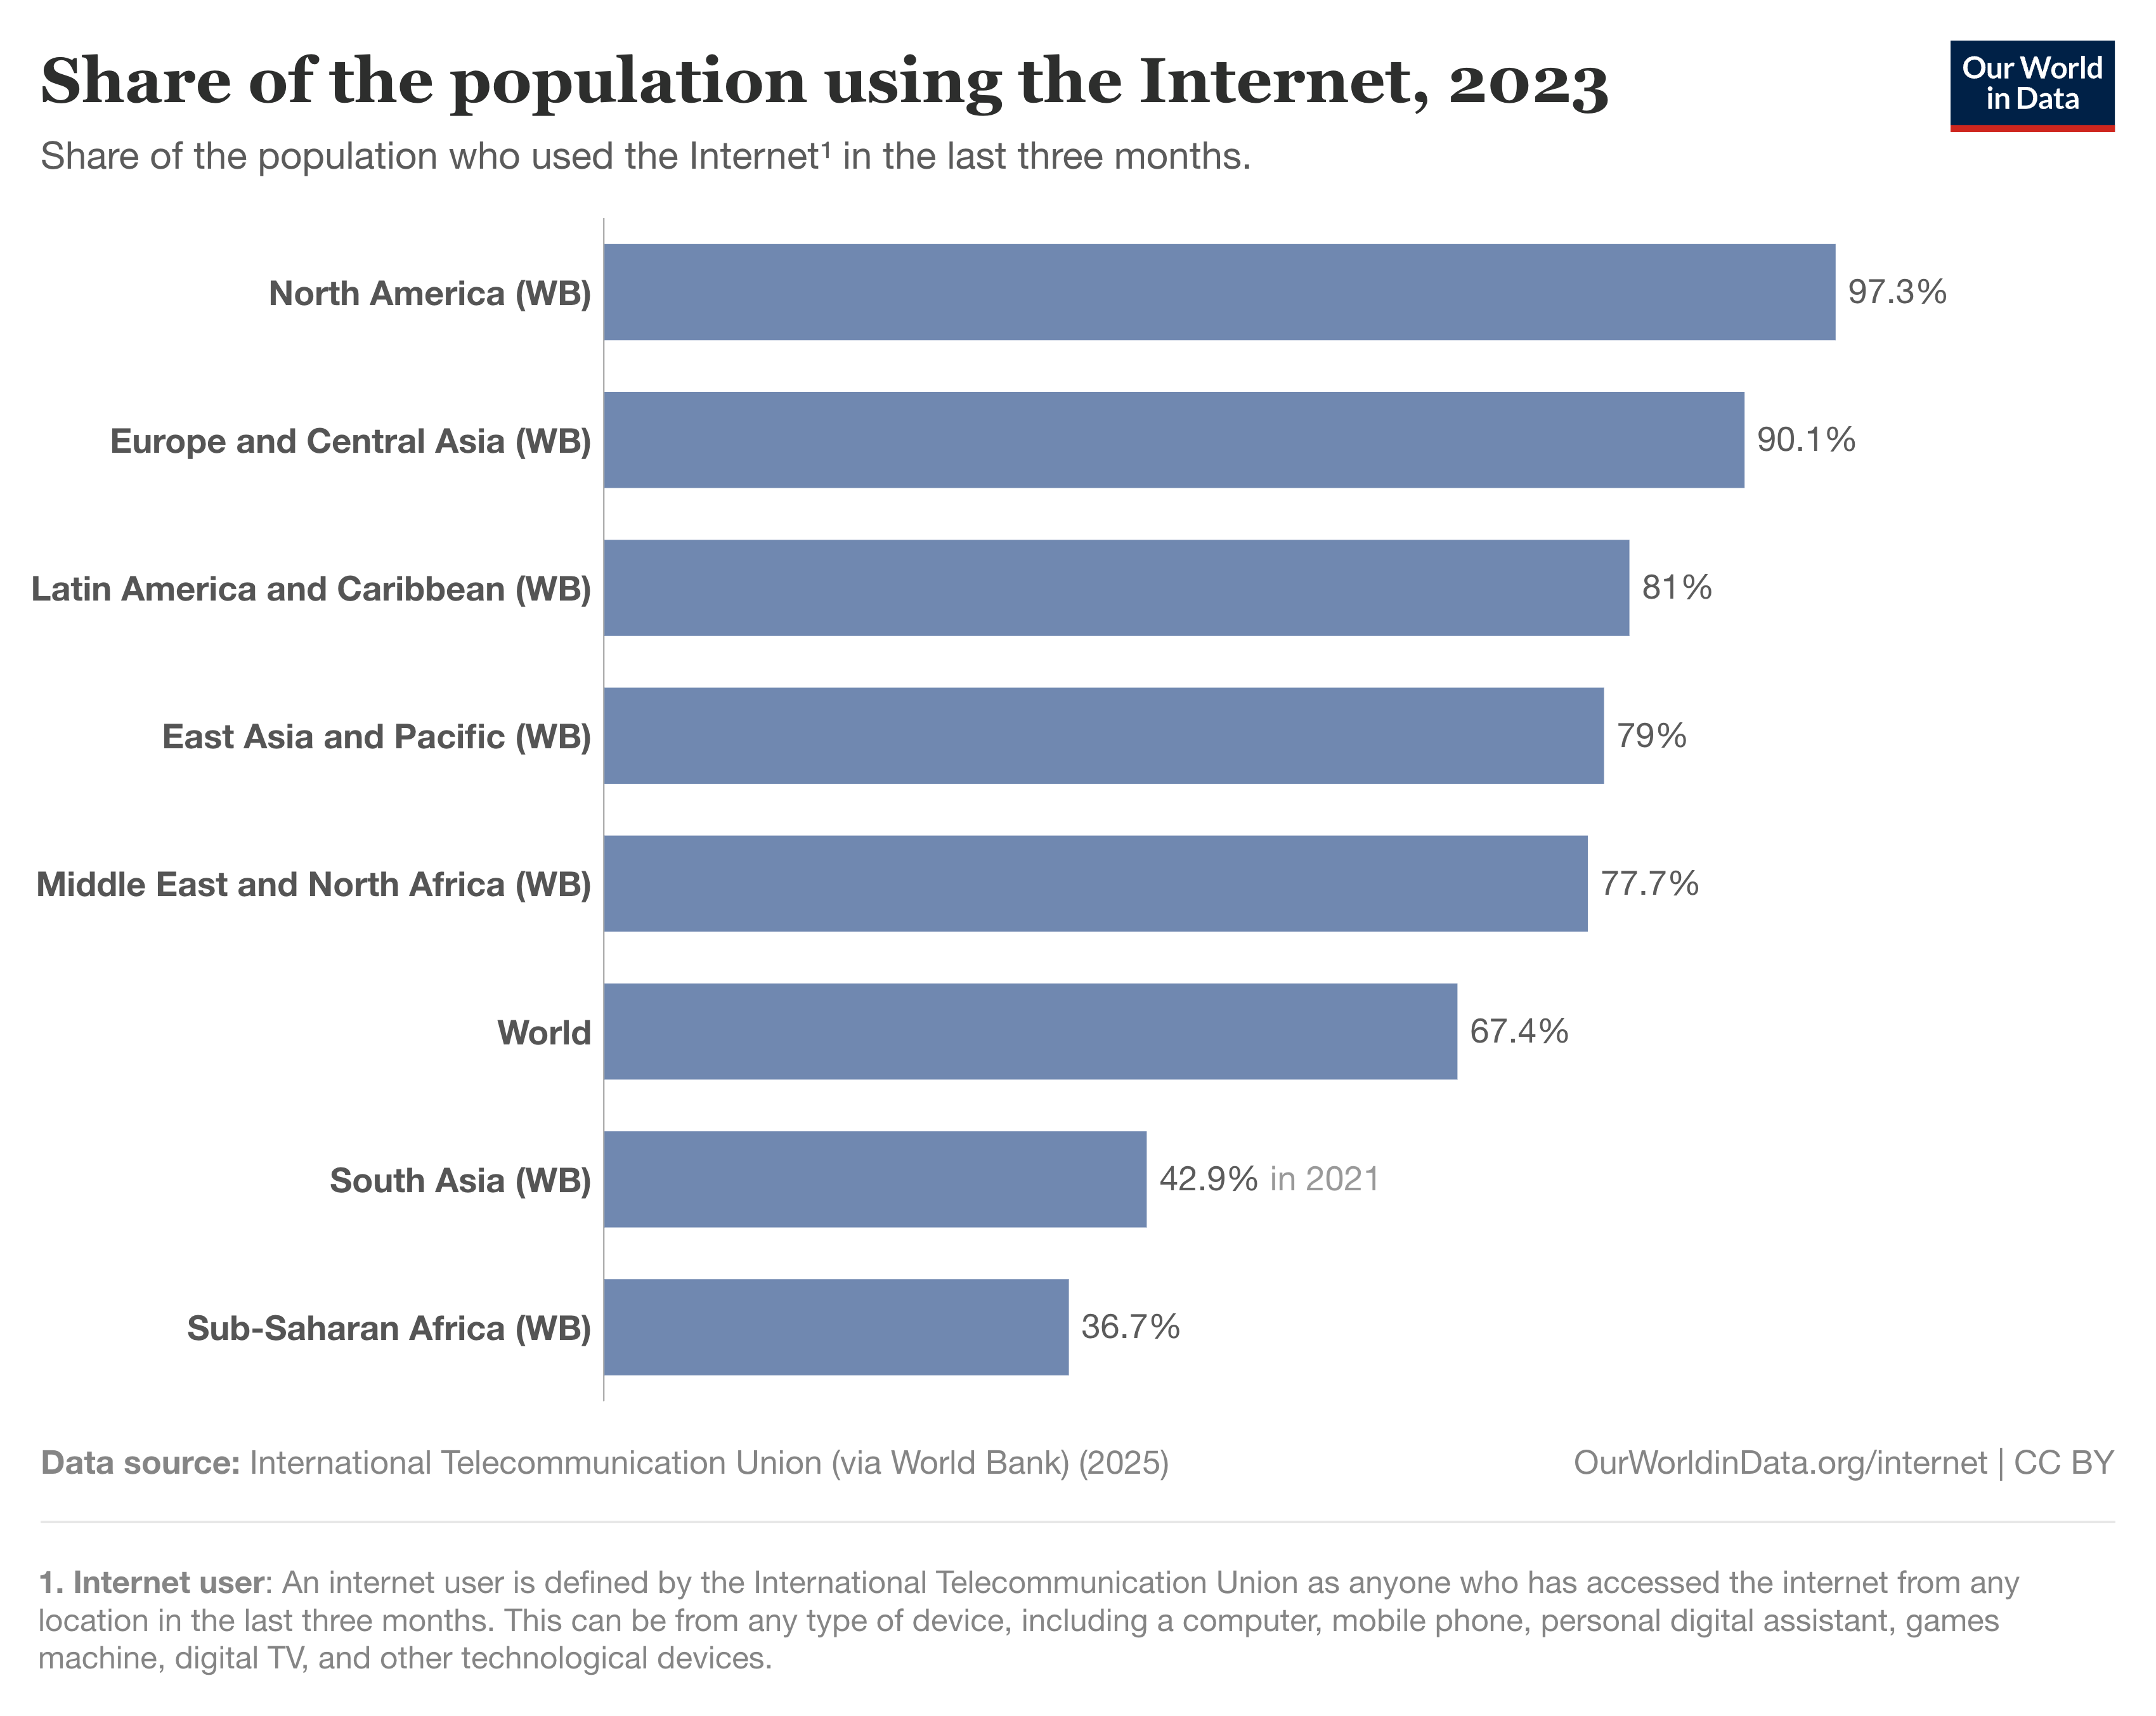


## a) Recreate this visualization using plotly, make it as close as possible to the image.

## b) Apply storytelling principles to improve this visualization. You can make several variations if you want to tell different stories.

In [63]:
import pandas as pd

df = pd.read_csv("share-of-individuals-using-the-internet.csv")

df.head()

,Entity,Code,Year,Individuals using the Internet (% of population)
0,Afghanistan,AFG,1990,0.0
1,Afghanistan,AFG,1991,0.0
2,Afghanistan,AFG,1992,0.0
3,Afghanistan,AFG,1993,0.0
4,Afghanistan,AFG,1994,0.0


In [64]:
regions = [
    "North America (WB)",
    "Europe and Central Asia (WB)",
    "Latin America and Caribbean (WB)",
    "East Asia and Pacific (WB)",
    "Middle East and North Africa (WB)",
    "World",
    "South Asia (WB)",  # OBS: har bara data t.o.m. 2021
    "Sub-Saharan Africa (WB)",
]

In [65]:
regions_2023 = [
    "North America (WB)",
    "Europe and Central Asia (WB)",
    "Latin America and Caribbean (WB)",
    "East Asia and Pacific (WB)",
    "Middle East and North Africa (WB)",
    "World",
    "Sub-Saharan Africa (WB)",
]

In [66]:
df_2023 = df[(df["Year"] == 2023) & (df["Entity"].isin(regions_2023))]

In [67]:
df_2023

,Entity,Code,Year,Individuals using the Internet (% of population)
1794,East Asia and Pacific (WB),NaN,2023,79.0
2115,Europe and Central Asia (WB),NaN,2023,90.1
3521,Latin America and Caribbean (WB),NaN,2023,81.0
4286,Middle East and North Africa (WB),NaN,2023,77.7
4828,North America (WB),NaN,2023,97.3
6136,Sub-Saharan Africa (WB),NaN,2023,36.7
7086,World,OWID_WRL,2023,67.4


In [68]:
df_south_asia_2021 = df[(df["Entity"] == "South Asia (WB)") & (df["Year"] == 2021)]

In [69]:
df_south_asia_2021

,Entity,Code,Year,Individuals using the Internet (% of population)
5997,South Asia (WB),NaN,2021,42.850647


In [70]:
df_south_asia_row = pd.DataFrame(
    [
        {
            "Entity": "South Asia (WB)",
            "Code": "N/A",
            "Year": 2021,
            "Individuals using the Internet (% of population)": df_south_asia_2021["Individuals using the Internet (% of population)"].values[0]
        }
    ]
)

In [71]:
df_south_asia_row

,Entity,Code,Year,Individuals using the Internet (% of population)
0,South Asia (WB),N/A,2021,42.850647


In [72]:
df_combined = pd.concat([df_2023, df_south_asia_row], ignore_index=True)

In [73]:
region_order = [
    "North America (WB)",
    "Europe and Central Asia (WB)",
    "Latin America and Caribbean (WB)",
    "East Asia and Pacific (WB)",
    "Middle East and North Africa (WB)",
    "World",
    "South Asia (WB)",
    "Sub-Saharan Africa (WB)"
]

df_combined_sorted = df_combined.set_index("Entity").reindex(region_order).reset_index()

In [74]:
df_combined_sorted

,Entity,Code,Year,Individuals using the Internet (% of population)
0,North America (WB),NaN,2023,97.300000
1,Europe and Central Asia (WB),NaN,2023,90.100000
2,Latin America and Caribbean (WB),NaN,2023,81.000000
3,East Asia and Pacific (WB),NaN,2023,79.000000
4,Middle East and North Africa (WB),NaN,2023,77.700000
5,World,OWID_WRL,2023,67.400000
6,South Asia (WB),N/A,2021,42.850647
7,Sub-Saharan Africa (WB),NaN,2023,36.700000


In [106]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
    x=df_combined_sorted["Individuals using the Internet (% of population)"][::-1],
    y=df_combined_sorted["Entity"][::-1],
    orientation='h',
    marker_color='steelblue'
))

fig.update_layout(
    title="Share of the population using the Internet, 2023",
    xaxis_title="Percentage (%)",
    yaxis_title="",
    xaxis=dict(range=[0, 100], ticksuffix='%'),
    plot_bgcolor='white',
    font=dict(size=14),
    margin=dict(l=150, r=60, t=60, b=40)
)

fig.add_annotation(
    x=df_combined_sorted[df_combined_sorted["Entity"] == "South Asia (WB)"]["Individuals using the Internet (% of population)"].values[0],
    y="South Asia (WB)",
    text="   in 2021",
    showarrow=False,
    xanchor='left',
    font=dict(size=12, color="dark grey"),
    yshift=0
)

fig.show()